In [11]:
conda install -c conda-forge geopandas

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.7.2               |     pyhd8ed1ab_0          28 KB  conda-forge
    cairo-1.16.0               |       h302bd0f_5         1.0 MB
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.7.2                |     pyhd8ed1ab_1          10 KB  conda-forge
    conda-24.11.0              |  py312h81bd7bf_0         1.1 MB  conda-forge
    fiona-1.9.5                |  py312hd77ebd4_0         905 KB
    folium-0.18.0              |     pyhd8ed1ab_0          77 KB  conda-forge
    fontconfig-2.14.2          |       h82840c6_0         232 KB  conda

In [1]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 323 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 363 kB/s eta 0:00:01     |███████████████████████████████▊| 11.2 MB 888 kB/s eta 0:00:01
     |████████████████████████████████| 13.7 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 15.1 MB 62.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 346 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 4.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 5.1 MB/s eta 0:00:011
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 1.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [26]:
import geopandas as gpd
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

Import Datasets

In [3]:
# Define the directory where the CSV files are saved
save_directory = "Cleaned_neighborhood_csvs"

# List of filenames to open
filenames = [
    "geocoded_df.csv",
    "neighbourhoods_df_cleaned.csv",
    "parks_df.csv",
    "schools_df.csv",
    "filtered_gdf.csv"
]

# Dictionary to store the DataFrames
dataframes = {}

# Loop through the filenames and read the CSVs into DataFrames
for filename in filenames:
    file_path = os.path.join(save_directory, filename)
    dataframes[filename] = pd.read_csv(file_path)


# Access the loaded DataFrames by filename (example)
geocoded_df = dataframes.get("geocoded_df.csv") # development applications
neighbourhoods_df_profiles = dataframes.get("neighbourhoods_df_cleaned.csv") # geometry shape file
parks_df = dataframes.get("parks_df.csv") # parks data
schools_df = dataframes.get("schools_df.csv") # school data
filtered_gdf = dataframes.get("filtered_gdf.csv") # homeless shelter data
# neighbourhoods_df_pivoted = dataframes.get("pivoted_neighbourhood_profiles.csv") # neighborhood profiles with income
neighbourhoods_df_pivoted = pd.read_csv('pivoted_neighbourhood_profiles.csv')


In [4]:
PollinateTO_df = pd.read_csv('PollinateTO_cleaned.csv')

In [6]:
print(PollinateTO_df.columns)

Index(['_id', 'ID', 'YEAR_FUNDED', 'GROUP_NAME', 'PROJECT_NAME', 'GARDEN_TYPE',
       'NUMBER_OF_GARDENS', 'ESTIMATED_GARDEN_SIZE', 'NEIGHBOURHOOD_NUMBER',
       'NIA_OR_EN', 'PRIMARY_LOCATION_NAME', 'PRIMARY_GARDEN_ADDRESS',
       'POSTAL_CODE', 'IS_INDIGENOUS_GARDEN', 'WARD_NAME', 'WARD_NUMBER',
       'geometry'],
      dtype='object')


## Load Weather Data

In [5]:
weather_df = pd.read_csv('weather_df.csv')

In [7]:
# Count entries of PollinateTO projects for each funded year
year_counts = PollinateTO_df['YEAR_FUNDED'].value_counts()

print(year_counts)

YEAR_FUNDED
2023    44
2022    40
2020    33
2021    32
Name: count, dtype: int64


We can see that there are more projects funded as each year progresses. Let's examine this and see if weather played a role.

The weather variables that we want to focus on are:
- Annual average temperature: to observe general climate trends over years
- Annual precipitation: to see if wetter or drier years align with more gardens funded

In [9]:
# Prepare yearly weather aggregates

# Count the number of gardens funded each year
gardens_funded = PollinateTO_df['YEAR_FUNDED'].value_counts().sort_index()
gardens_funded.name = 'gardens_funded'

# Merge weather and garden data on 'year'
merged_df = pd.merge(weather_df, gardens_funded, left_on='Year', right_index=True)

print(merged_df)

      Longitude (x)  Latitude (y)  Station Name  Climate ID  Year  Month  Day  \
365           -79.4         43.67  TORONTO CITY     6158355  2020      1    1   
366           -79.4         43.67  TORONTO CITY     6158355  2020      1    2   
367           -79.4         43.67  TORONTO CITY     6158355  2020      1    3   
368           -79.4         43.67  TORONTO CITY     6158355  2020      1    4   
369           -79.4         43.67  TORONTO CITY     6158355  2020      1    5   
...             ...           ...           ...         ...   ...    ...  ...   
1821          -79.4         43.67  TORONTO CITY     6158355  2022     12   27   
1822          -79.4         43.67  TORONTO CITY     6158355  2022     12   28   
1823          -79.4         43.67  TORONTO CITY     6158355  2022     12   29   
1824          -79.4         43.67  TORONTO CITY     6158355  2022     12   30   
1825          -79.4         43.67  TORONTO CITY     6158355  2022     12   31   

      Data Quality  Max Tem

In [29]:
# Correlation matrix between weather variables and gardens funded
corr_matrix = merged_df[['Mean Temp (°C)', 'Total Precip (mm)', 'gardens_funded']].corr()

print(corr_matrix)

                   Mean Temp (°C)  Total Precip (mm)  gardens_funded
Mean Temp (°C)           1.000000           0.018685       -0.005620
Total Precip (mm)        0.018685           1.000000        0.003762
gardens_funded          -0.005620           0.003762        1.000000


In [20]:
# Shift weather data by one year
merged_df['lagged_avg_temp'] = merged_df['Mean Temp (°C)'].shift(1)
merged_df['lagged_total_precipitation'] = merged_df['Total Precip (mm)'].shift(1)

# Calculate correlation with lagged weather
lagged_corr = merged_df[['lagged_avg_temp', 'lagged_total_precipitation', 'gardens_funded']].corr()

print(lagged_corr)

                            lagged_avg_temp  lagged_total_precipitation  \
lagged_avg_temp                    1.000000                    0.019611   
lagged_total_precipitation         0.019611                    1.000000   
gardens_funded                    -0.005737                    0.001702   

                            gardens_funded  
lagged_avg_temp                  -0.005737  
lagged_total_precipitation        0.001702  
gardens_funded                    1.000000  


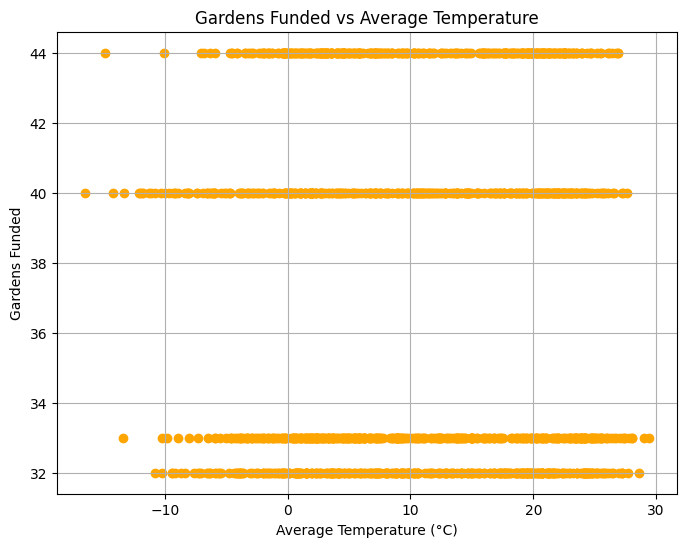

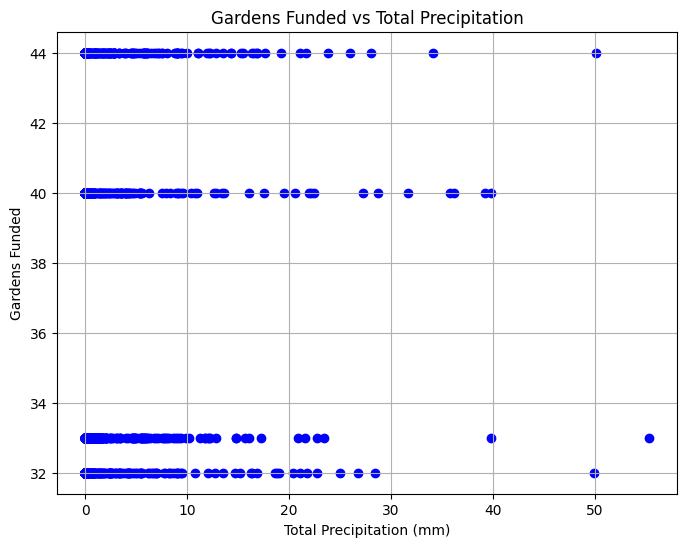

In [22]:
# Scatter plot for gardens funded vs average temperature
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Mean Temp (°C)'], merged_df['gardens_funded'], color='orange')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Gardens Funded')
plt.title('Gardens Funded vs Average Temperature')
plt.grid(True)
plt.show()

# Scatter plot for gardens funded vs total precipitation
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Total Precip (mm)'], merged_df['gardens_funded'], color='blue')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Gardens Funded')
plt.title('Gardens Funded vs Total Precipitation')
plt.grid(True)
plt.show()


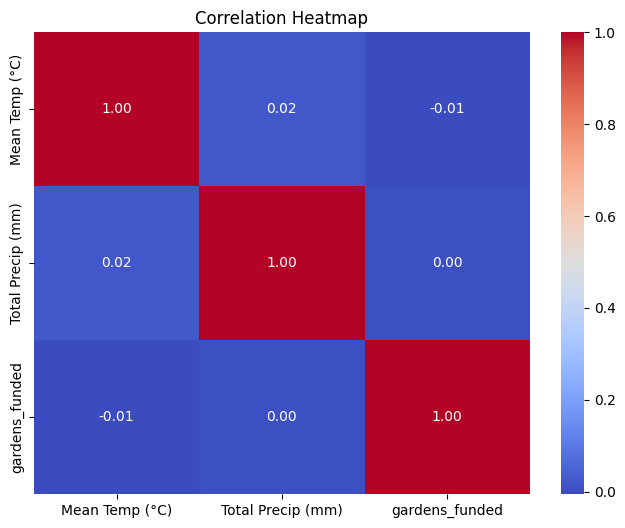

In [30]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()